#### Import necessary packages:

In [505]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#### Read files and load data into dataframe:

In [506]:
data=pd.read_csv('autos.csv', encoding='ANSI')

#### First look at the data:

In [507]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [508]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

#### There are 371528 observations (20 columns - variables). Dates are saved as strings. Let's convert it to work later on:

In [509]:
for i in ['dateCrawled', 'dateCreated', 'lastSeen']:
    data[i]=data[i].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

#### Checking for missing values in the dataset:

In [510]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

#### <font color=brown />There are some variables having missing values.

## <font color=blue /> Univariate Analysis.

### Variable - Price

In [511]:
data.price.describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

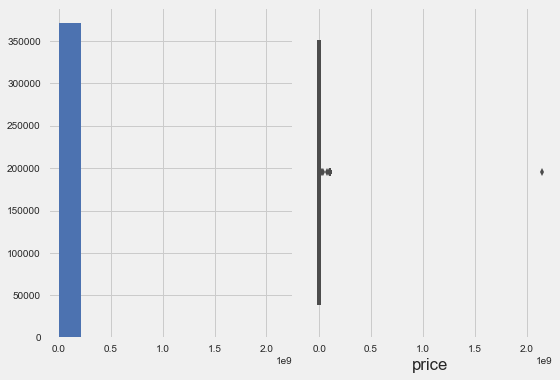

In [512]:
plt.subplot(1,2,1)
data.price.hist()
plt.subplot(1,2,2)
sns.boxplot(x='price', data=data)
plt.tight_layout()
plt.show()

#### It looks like there is bunch of prices which have high prices and make visualization difficult for analysis. Create sort of crosstab to get distribution of prices

In [513]:
prices={'less than 10000':0, 'between 10000 and 100000':0, 'more than 100000':0}
for i in data['price']:
    if i <10000:
        prices['less than 10000']+=1
    elif i>=10000 and i<=100000:
        prices['between 10000 and 100000']+=1
    else:
        prices['more than 100000']+=1
prices

{'between 10000 and 100000': 60885,
 'less than 10000': 310240,
 'more than 100000': 403}

#### Created more detalized charts on different level of price:

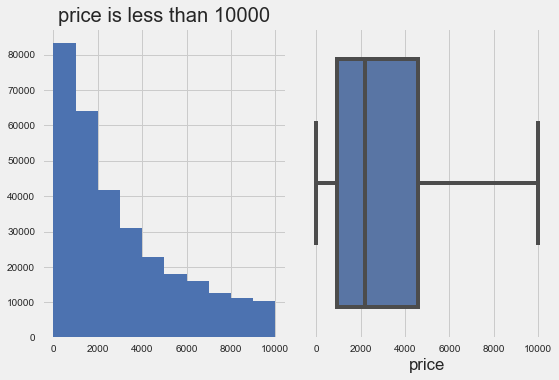

In [514]:
dt10000=data[data.price<=10000]
plt.subplot(1,2,1)
plt.title('price is less than 10000')
dt10000.price.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='price', data=dt10000)
plt.tight_layout()
plt.show()

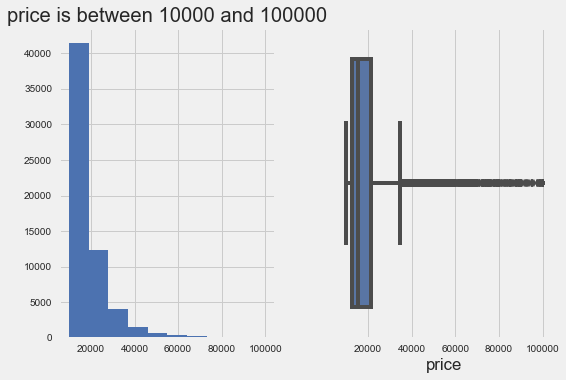

In [515]:
dt100000=data[data.price.between(10000,100000)]
plt.subplot(1,2,1)
plt.title('price is between 10000 and 100000')
dt100000.price.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='price', data=dt100000)
plt.tight_layout()
plt.show()

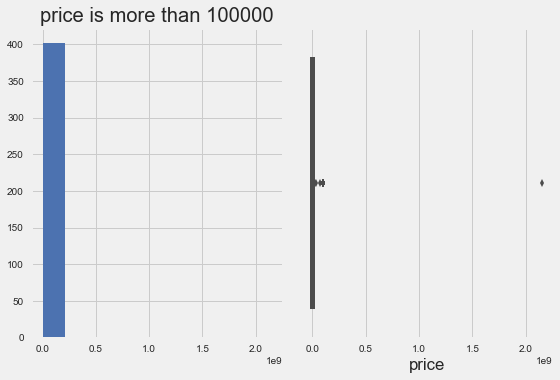

In [516]:
dt=data[data.price>100000]
plt.subplot(1,2,1)
plt.title('price is more than 100000')
dt.price.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='price', data=dt)
plt.tight_layout()
plt.show()

#### <font color=#403B8C /> Absolute majority of prices are less than 100000.

#### Look at the price in logarithmic scale.

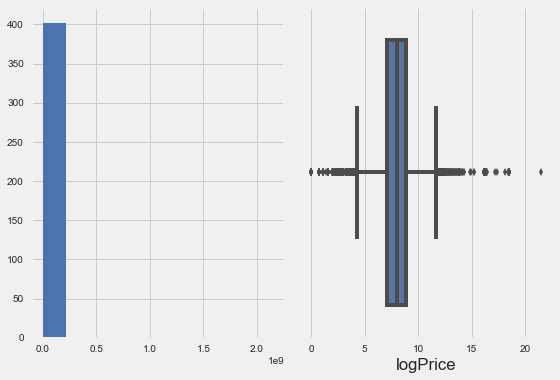

In [517]:
data['logPrice']=data.price.apply(lambda x: np.log(x))
plt.subplot(1,2,1)
#plt.title('price is more than 100000')
dt.price.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='logPrice', data=data)
plt.tight_layout()
plt.show()

### Variable - yearOfRegistration.

In [518]:
data['yearOfRegistration'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [519]:
years_freq={'earlier than 1980':0, 'looks like real car':0, 'cars from the future':0}
for year in data['yearOfRegistration']:
    if year<1980:
        years_freq['earlier than 1980']+=1
    elif year>2017:
        years_freq['cars from the future']+=1
    else:
        years_freq['looks like real car']+=1
years_freq

{'cars from the future': 4134,
 'earlier than 1980': 4119,
 'looks like real car': 363275}

#### <font color=#403B8C /> According to descriptive statistics in the column yearOfRegistration some of skewed data: incorrect years (too small or big). I've splitted years for 3 groups: cars with year of registration before 1980 (it looks suspicious because i don't think there are many people who sell oldtimers (classic car year of registration more than 30 years from now) through eBay. And of course if year is more than current year it is suspicious as well. So there are around 8300 incorrect values.

### Variable - powerPS.

In [520]:
data['powerPS'].describe()

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

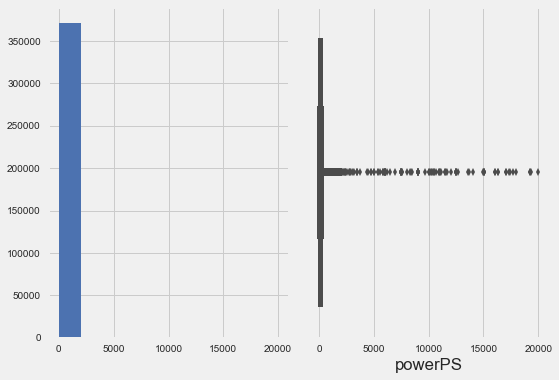

In [441]:
plt.subplot(1,2,1)
data.powerPS.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='powerPS', data=data)
plt.tight_layout()
plt.show()

In [521]:
powerPS_freq={'less 60 - get a real horse better':0, 'looks like real car (ordinary european would buy)':0, 'ps more than 2000 (cars for Arabian sheikh)':0}
for powerPS in data['yearOfRegistration']:
    if powerPS<60:
        powerPS_freq['less 60 - get a real horse better']+=1
    elif powerPS>2000:
        powerPS_freq['ps more than 2000 (cars for Arabian sheikh)']+=1
    else:
        powerPS_freq['looks like real car (ordinary european would buy)']+=1
powerPS_freq

{'less 60 - get a real horse better': 0,
 'looks like real car (ordinary european would buy)': 128181,
 'ps more than 2000 (cars for Arabian sheikh)': 243347}

#### <font color=#403B8C /> PowerPS (German) is almost equal (~98,6% of) brake horsepower (bhp). They are interchangeable so we can evaluate quality of the data according to knowledge of bhp. Values more than 2000 are suspicious because too high, less than 60 are too low (just little investigation of possible values for bhp. It looks like majority of the data is incorrect or another metric units is used by users. 

### Variable - kilometer.

In [522]:
data['kilometer'].describe()

count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

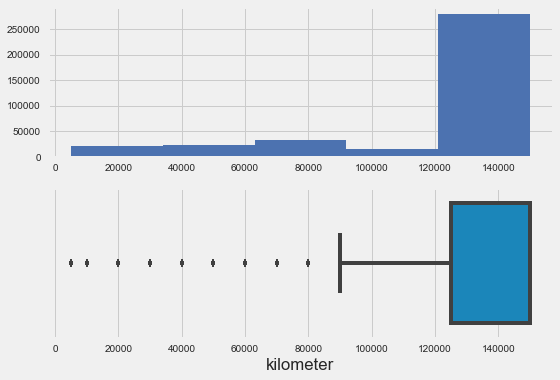

In [523]:
plt.subplot(2,1,1)
data.kilometer.hist(bins=5)
plt.style.use('fivethirtyeight')
plt.subplot(2,1,2)
sns.boxplot(x='kilometer', data=data)
plt.tight_layout()
plt.show()

#### <font color=#403B8C />  Such things like kilometers and year of registration are usually related (the older car the more kilometers it has driven). So the variable could help us to restore some of incorrect years data

#### We can treat incorrect or suspicious years using field kilometer.
#### Replace incorrect years for car with typical year for particular value of kilometer.

In [525]:
dfy=data[data.yearOfRegistration.between(1980,2017)]
dfyear=dfy.groupby(['kilometer','yearOfRegistration']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
def year(x):
    if x[7] < 1980 or x[7] > 2017:
        year=dfyear[x[11]]
    else:
        year=x[7]
    return year
data['yearOfRegistration']=data.apply(lambda x: year(x), axis=1)

In [527]:
data['yearOfRegistration'].describe()

count    371528.000000
mean       2003.597266
std           6.559798
min        1980.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2017.000000
Name: yearOfRegistration, dtype: float64

### Variable - monthOfRegistration.

In [528]:
pd.crosstab(data.monthOfRegistration, columns='count')

col_0,count
monthOfRegistration,
0,37675
1,24561
2,22403
3,36170
4,30918
5,30631
6,33167
7,28958
8,23765


There are some incorrect values (0s). Since we can't restore that data just replace it  with 1 (january):

In [529]:
data['monthOfRegistration']=data['monthOfRegistration'].apply(lambda x: (1) if x==0 else x)

#### <font color=#403B8C /> Variable month has int type, but of course should be considered as categorical variable.
#### <font color=#403B8C /> The same goes for postalCode variable.
#### <font color=#403B8C /> We won't consider variable nrOfPictures since there is mention about it contains o everywhere and therefore useless.

### Nominal variables

### Variable - nameOfCar.

In [530]:
data['name'].describe()

count          371528
unique         233531
top       Ford_Fiesta
freq              657
Name: name, dtype: object

#### <font color=#403B8C />  There are a lot of different names in the set so it is not convient for visualization. The variable can be useful for treatment of missing values for model or vehicleType variables.

In [531]:
def nominal_expl(column):
    names=data[column].unique()
    vals=data.groupby(column)['dateCrawled'].nunique()
    vals.plot(kind='bar')
    plt.style.use('seaborn-deep')
    plt.xticks(size=12)
    plt.tight_layout()
    plt.show()
    return data[column].describe()

### Variable - seller

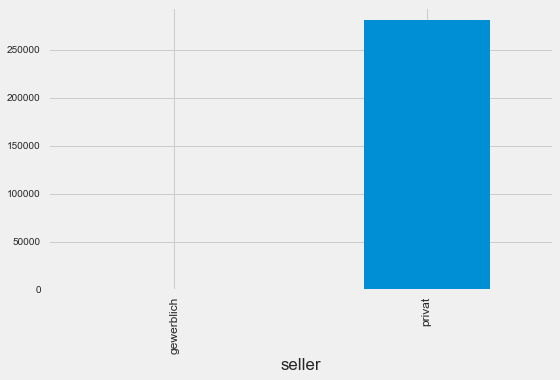

count     371528
unique         2
top       privat
freq      371525
Name: seller, dtype: object

In [532]:
nominal_expl('seller')

#### <font color=#403B8C />  There are only 3 commercial sell case for all dataset. This variable is unlikely to be useful for analysis and model.

### Variable - offertype

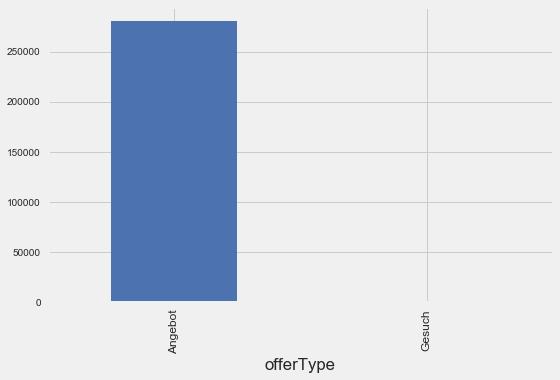

count      371528
unique          2
top       Angebot
freq       371516
Name: offerType, dtype: object

In [533]:
nominal_expl('offerType')

#### <font color=#403B8C />  Almost all offerType are "Angebot". This variable is unlikely to be useful for analysis and model

### Variable - abtest

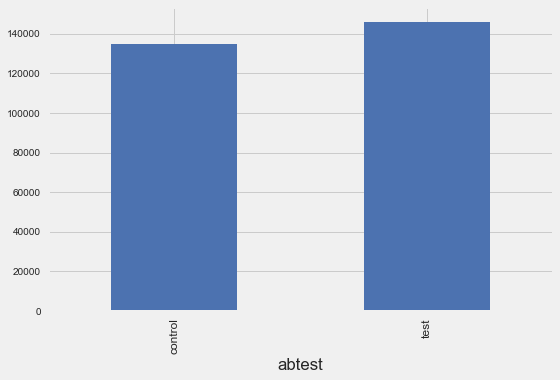

count     371528
unique         2
top         test
freq      192585
Name: abtest, dtype: object

In [534]:
nominal_expl('abtest')

### Variable - vehicleType

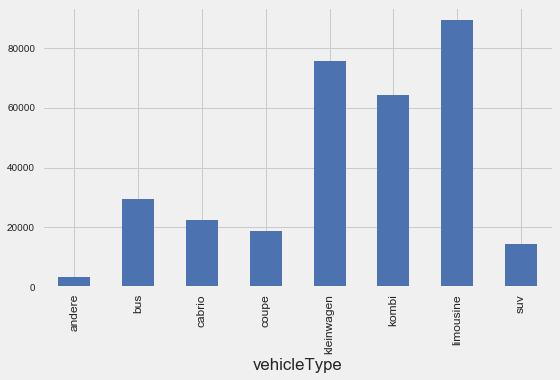

count        333659
unique            8
top       limousine
freq          95894
Name: vehicleType, dtype: object

In [535]:
nominal_expl('vehicleType')

#### <font color=#403B8C />  There are 37869 missing values

### Variable - gearBox

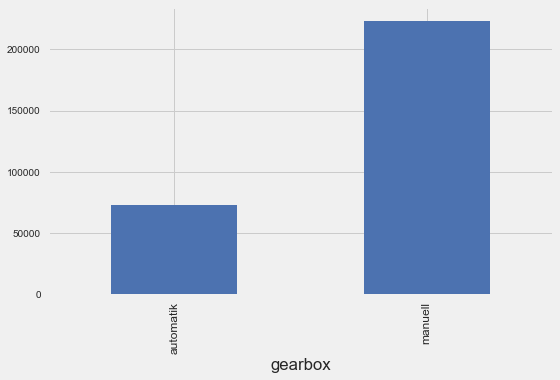

count      351319
unique          2
top       manuell
freq       274214
Name: gearbox, dtype: object

In [536]:
nominal_expl('gearbox')

#### <font color=#403B8C />  There are 20209 missing values. It is possible that variable name can help with treatment in that case as well

### Variable - model

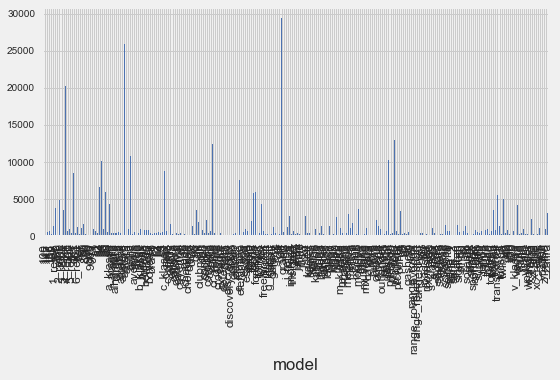

count     351044
unique       251
top         golf
freq       30070
Name: model, dtype: object

In [537]:
nominal_expl('model')

In [538]:
data.model[data['model'].isnull()==False].head()

0     golf
2    grand
3     golf
4    fabia
5      3er
Name: model, dtype: object

#### <font color=#403B8C />  There are 20484 missing values and 251 unique values. 

### Variable - fuelType

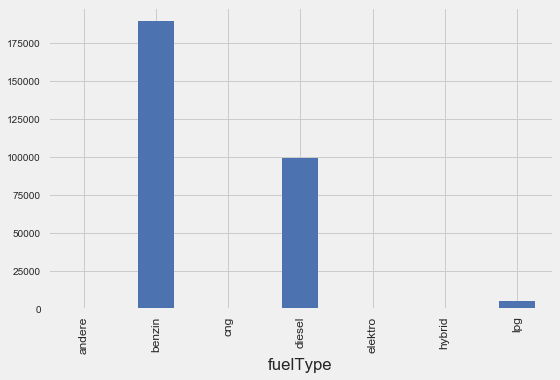

count     338142
unique         7
top       benzin
freq      223857
Name: fuelType, dtype: object

In [539]:
nominal_expl('fuelType')

#### <font color=#403B8C />  There are 33386 missing values and 8 unique values. 

### Variable - brand

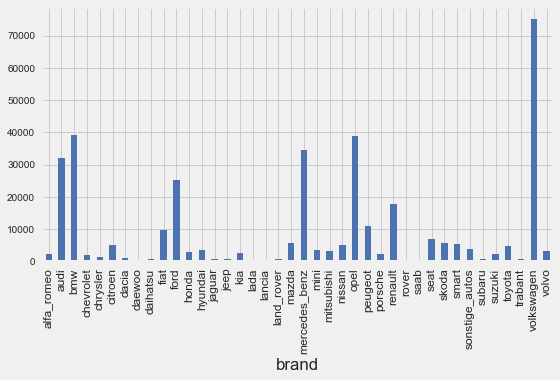

count         371528
unique            40
top       volkswagen
freq           79640
Name: brand, dtype: object

In [540]:
nominal_expl('brand')

### Variable - notRepairedDamage

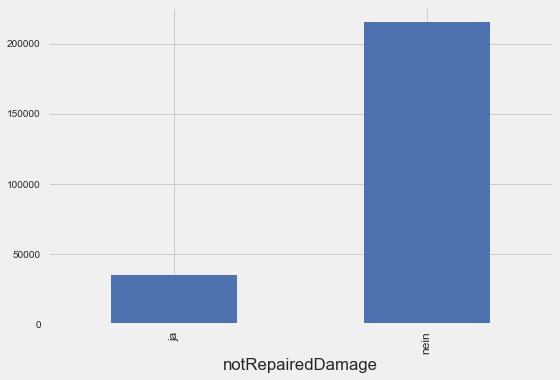

count     299468
unique         2
top         nein
freq      263182
Name: notRepairedDamage, dtype: object

In [541]:
nominal_expl('notRepairedDamage')

#### <font color=#403B8C />  There are 72060 missing values.  I think it is possible to fill it with "nein" (no) since it is typical in the dataset (generalized imputation).

### Variable - dateCrawled

In [542]:
data.dateCrawled.describe()

count                  371528
unique                 280500
top       2016-03-24 14:49:47
freq                        7
first     2016-03-05 14:06:22
last      2016-04-07 14:36:58
Name: dateCrawled, dtype: object

#### <font color=#403B8C />  The variable dateCrawled just show us date range for data scraping. I don't think it is usefull for futher analysis.

### Variables - dateCreated and lastSeen

In [543]:
data.dateCreated.describe()

count                  371528
unique                    114
top       2016-04-03 00:00:00
freq                    14450
first     2014-03-10 00:00:00
last      2016-04-07 00:00:00
Name: dateCreated, dtype: object

In [544]:
data.lastSeen.describe()

count                  371528
unique                 182806
top       2016-04-06 13:45:54
freq                       17
first     2016-03-05 14:15:08
last      2016-04-07 14:58:51
Name: lastSeen, dtype: object

#### <font color=#403B8C />  The variables can be used to estimate how long a car will be at least online before it is sold (other words target variable??). I will create that new variable daysOnline.

In [545]:
data['daysOnline']=(data['lastSeen']-data['dateCreated']).apply(lambda x:x.days)

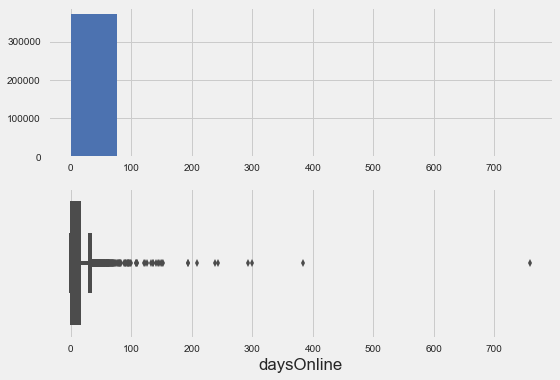

In [546]:
plt.subplot(2,1,1)
data.daysOnline.hist()
plt.style.use('seaborn-deep')
plt.subplot(2,1,2)
sns.boxplot(x='daysOnline', data=data)
plt.tight_layout()
plt.show()

#### Look at the daysOnline in logarithmic scale:

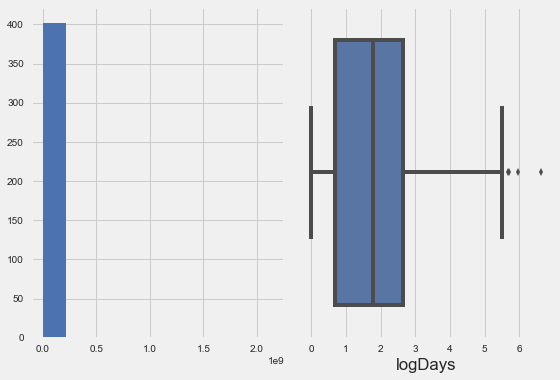

In [547]:
data['logDays']=data.daysOnline.apply(lambda x: np.log(x))
plt.subplot(1,2,1)
#plt.title('price is more than 100000')
dt.price.hist()
plt.style.use('seaborn-deep')
plt.subplot(1,2,2)
sns.boxplot(x='logDays', data=data)
plt.tight_layout()
plt.show()

In [548]:
data['daysOnline'].describe()

count    371528.000000
mean          8.814819
std           8.698263
min           0.000000
25%           2.000000
50%           6.000000
75%          14.000000
max         759.000000
Name: daysOnline, dtype: float64

#### <font color=#403B8C />  It looks like some cars have been at the site for a quite long time

In [549]:
data.daysOnline[data['daysOnline']>150].count()

10

####  They are extraordinary but natural cases. Maybe it is better to consider them separately.

In [550]:
data[data.daysOnline>150]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,logPrice,daysOnline,logDays
4192,2016-03-23 14:42:46,Der_VAN_ist_zu_OSTERN_reisefertig,privat,Angebot,6000,test,bus,1995,automatik,200,...,benzin,chevrolet,nein,2015-03-20,0,24558,2016-04-07 03:45:01,8.699515,384,5.950643
5310,2016-03-23 01:48:59,Mercedes_Benz_C220_BT__7G_Tronic_AMG__Modellja...,privat,Angebot,47900,test,limousine,2014,automatik,0,...,diesel,mercedes_benz,NaN,2015-06-11,0,46145,2016-04-06 09:47:02,10.776871,300,5.703782
64201,2016-03-16 11:48:06,Alfa_Romeo_147_GTA,privat,Angebot,8999,test,NaN,2005,NaN,0,...,benzin,alfa_romeo,NaN,2014-03-10,0,79669,2016-04-07 04:46:24,9.104869,759,6.632002
79265,2016-03-14 08:43:53,VW_Polo_1.2_Cricket__2005_mit_Tauschmotor_54TK...,privat,Angebot,600,test,kleinwagen,2005,manuell,54,...,benzin,volkswagen,ja,2015-09-04,0,72669,2016-03-15 14:16:58,6.396930,193,5.262690
90805,2016-04-02 19:47:40,Mercedes_SLK_200_AMG_Performance_19_Zoll___abs...,privat,Angebot,14250,control,cabrio,2005,manuell,163,...,benzin,mercedes_benz,nein,2015-08-07,0,76228,2016-04-07 09:15:23,9.564512,244,5.497168
180933,2016-03-05 16:55:31,Audi_Q7_3.0_TDI_7_Sitzer_Vollausstattung_Stand...,privat,Angebot,27900,control,suv,2009,automatik,239,...,diesel,audi,nein,2015-10-14,0,44651,2016-03-14 15:17:23,10.236382,152,5.023881
183656,2016-03-08 17:57:45,Cabrio_Peugeot_206_CC_Platinium_zum_Winterpreis!,privat,Angebot,5200,control,cabrio,2006,manuell,109,...,benzin,peugeot,nein,2015-08-10,0,26382,2016-04-05 20:46:54,8.556414,239,5.476464
231764,2016-03-15 01:56:49,VW_Polo_1.2_Cricket__2005_mit_Tauschmotor_54TK...,privat,Angebot,600,test,kleinwagen,2005,manuell,54,...,benzin,volkswagen,ja,2015-09-04,0,72669,2016-03-15 15:49:29,6.396930,193,5.262690
357144,2016-03-05 21:51:02,OPEL_CORSA_Apfelgruen_dringend_zu_verkaufen!,privat,Angebot,9500,test,kleinwagen,2013,manuell,90,...,diesel,opel,nein,2015-09-09,0,98739,2016-04-05 17:46:04,9.159047,209,5.342334
358891,2016-03-05 21:44:26,Fiat_Ducato,privat,Angebot,10400,test,bus,1993,NaN,0,...,diesel,fiat,NaN,2015-06-18,0,76275,2016-04-05 17:46:09,9.249561,292,5.676754


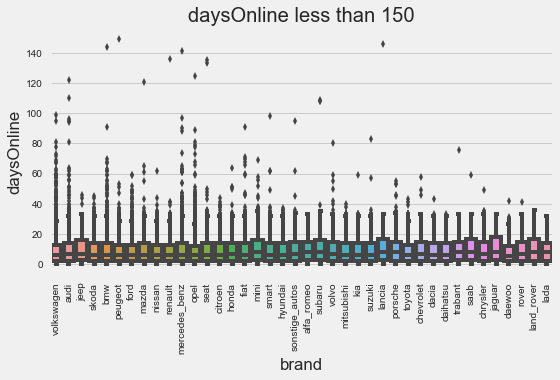

In [551]:
sns.boxplot(x='brand', y='daysOnline', data=data[data['daysOnline']<150])
plt.xticks(rotation=90)
plt.title('daysOnline less than 150')
plt.tight_layout()
plt.show()

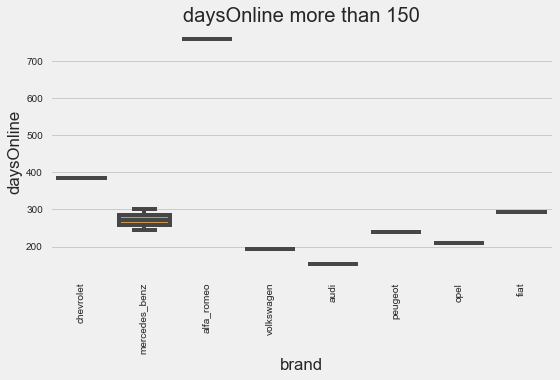

In [552]:
sns.boxplot(x='brand', y='daysOnline', data=data[data['daysOnline']>150])
plt.xticks(rotation=90)
plt.title('daysOnline more than 150')
plt.tight_layout()
plt.show()

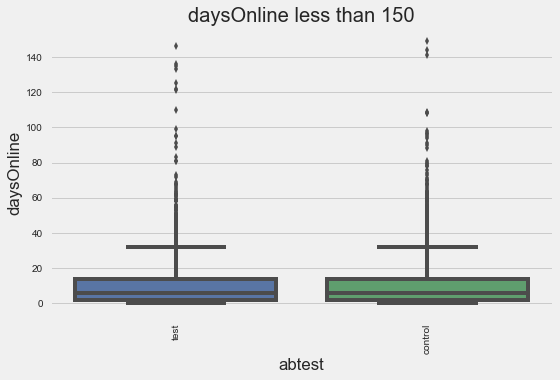

In [553]:
sns.boxplot(x='abtest', y='daysOnline', data=data[data['daysOnline']<150])
plt.xticks(rotation=90)
plt.title('daysOnline less than 150')
plt.tight_layout()
plt.show()

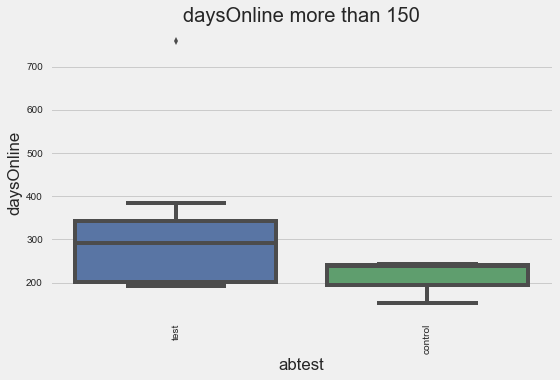

In [554]:
sns.boxplot(x='abtest', y='daysOnline', data=data[data['daysOnline']>150])
plt.xticks(rotation=90)
plt.title('daysOnline more than 150')
plt.tight_layout()
plt.show()

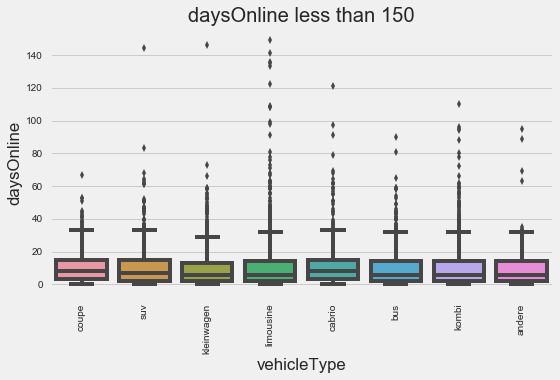

In [555]:
sns.boxplot(x='vehicleType', y='daysOnline', data=data[data.daysOnline<150])
plt.xticks(rotation=90)
plt.title('daysOnline less than 150')
plt.tight_layout()
plt.show()

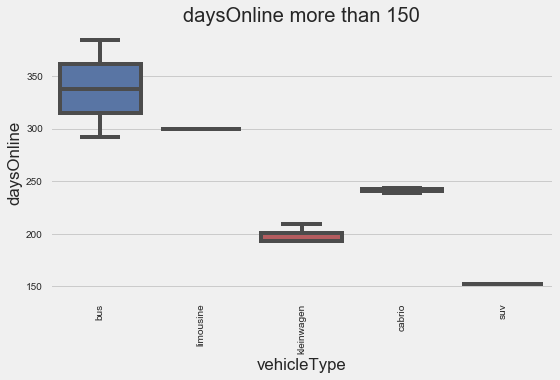

In [556]:
sns.boxplot(x='vehicleType', y='daysOnline', data=data[data.daysOnline>150])
plt.xticks(rotation=90)
plt.title('daysOnline more than 150')
plt.tight_layout()
plt.show()

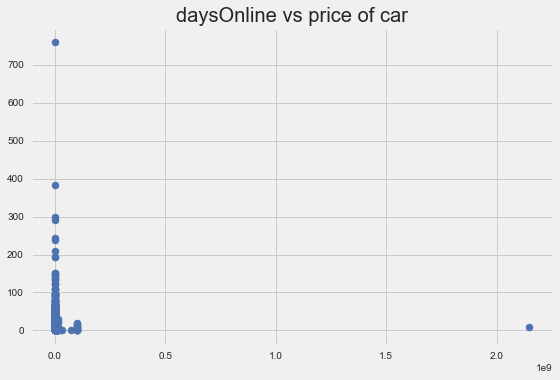

In [557]:
plt.scatter(x=data['price'], y=data['daysOnline'])
plt.title('daysOnline vs price of car')
plt.tight_layout()
plt.show()

#### <font color=#403B8C />  There are many outliers which make data skewed. It is possible to consider variable transormation for variables price and daysOnline (consider logarithm instead of real values)

### Treatment missing values

#### <font color=#403B8C />  There are some variables contain missing data: vehicleType, gearbox, model, fuelType, notRepairedDamage. I am going to treat missing values of vehicleType, gearbox and fuelType using Similar case imputation approach. I will use typical value of those variables for every specific brand to fill missing data.

In [558]:
df=data.groupby(['brand','gearbox']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
data = data.set_index(['brand'])
data['gearbox'] = data['gearbox'].fillna(df)
data = data.reset_index()

In [559]:
df=data.groupby(['brand','fuelType']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
data = data.set_index(['brand'])
data['fuelType'] = data['fuelType'].fillna(df)
data = data.reset_index()

In [560]:
df=data.groupby(['brand','vehicleType']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
data = data.set_index(['brand'])
data['vehicleType'] = data['vehicleType'].fillna(df)
data = data.reset_index()

#### Check that we treated the 3 variables:

In [561]:
data.isnull().sum()

brand                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
logPrice                   0
daysOnline                 0
logDays                    0
dtype: int64

#### <font color=#403B8C />  For treatment model variable i am going to use field name of a car. It is possible that seller doesn't point model again if he mentioned it in the name. So i am going to split name, look for model there and fill the variable "model" there it is possible.

In [562]:
data['name_list']=data.name.apply(lambda x: x.lower().split('_'))
for nl in data['name_list']:
    for i in nl:
        if len(i)<1 or type(i)==float:
            nl.remove(i)
mlst=data.model.unique()

In [563]:
model_mis=data[data.model.isnull()==True]
models=data[data.model.isnull()==False]
model_mis=model_mis[0:20485]

In [564]:
def models(lst):
    for indmodel in mlst:
        if indmodel in lst:
            return indmodel
model_mis['model']=model_mis['name_list'].apply(lambda x: models(x))

In [565]:
data=model_mis.append(data[data.model.isnull()==False])

#### Check how many data was replaced:

In [566]:
data.isnull().sum()

brand                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  11208
kilometer                  0
monthOfRegistration        0
fuelType                   0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
logPrice                   0
daysOnline                 0
logDays                    0
name_list                  0
dtype: int64

#### Use the same approach (typical model for every brand) there model was not found:

In [567]:
df=data.groupby(['brand','model']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
data = data.set_index(['brand'])
data['model'] = data['model'].fillna(df)
data = data.reset_index()

In [568]:
data.isnull().sum()

brand                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                      0
kilometer                  0
monthOfRegistration        0
fuelType                   0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
logPrice                   0
daysOnline                 0
logDays                    0
name_list                  0
dtype: int64

#### As mentioned before missing values in the field notRepairedDamage i fill with 'no'.

In [569]:
data['notRepairedDamage'] = data['notRepairedDamage'].fillna('nein')

In [570]:
data.isnull().sum()

brand                  0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
logPrice               0
daysOnline             0
logDays                0
name_list              0
dtype: int64

### During the analysis i created one new feature - daysOnline (to estimate how long a car will be at least online before it is sold). Also I treated missing values using different techniques. The outliers of variables daysOnline and price can be excluded from dataset or better using feature transformation for the fields. Some variables are unlikely to be useful or analysis and future model since they contain only one value in almost all observations. 